SPD                      105
CDU                      101
FDP                       76
AfD                       71
Bündnis 90/Die Grünen     63
Die Linke                 59
CSU                       24
Fraktionslos               3
AFD                        1
Name: party, dtype: int64
                       amount
SPD                       105
CDU                       101
FDP                        76
AfD                        72
Bündnis 90/Die Grünen      63
Die Linke                  59
CSU                        24
Fraktionslos                3


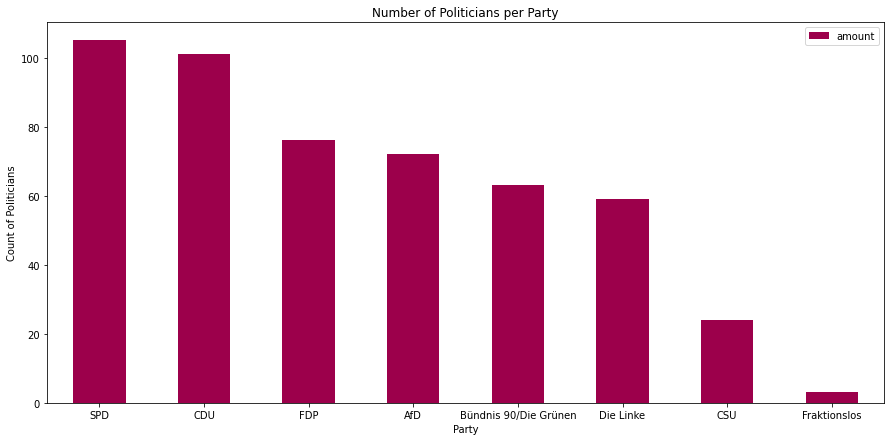

<Figure size 432x288 with 0 Axes>

In [31]:
#Politicians per party without 0 Tweets-Politicians
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

rawData = pd.read_csv(r"politicians_tweets_stats.csv")
newData = rawData[rawData.total_tweets_found != 0]
parties = newData.party
data = parties.value_counts()
print(data)
afd_amount = data.get('AfD') + data.get('AFD')
df = pd.DataFrame({'amount': newData.party.value_counts()})
df.replace(data.get('AfD'), afd_amount, inplace=True)
df.drop(index='AFD', inplace=True)
print(df)

chart = df.plot.bar(rot=0, figsize=(15,7), title="Number of Politicians per Party", color='#9C004B')
chart.set(xlabel="Party", ylabel="Count of Politicians")
#plt.savefig('tteesstt', figsize=(15,7))
f = plt.figure()
#f.savefig('politiciansPerParty.pdf', bbox_inches='tight')


[Text(0.5, 1.0, 'Number of Politicians per Party'),
 Text(0.5, 0, 'Party'),
 Text(0, 0.5, 'Count of Politicians')]

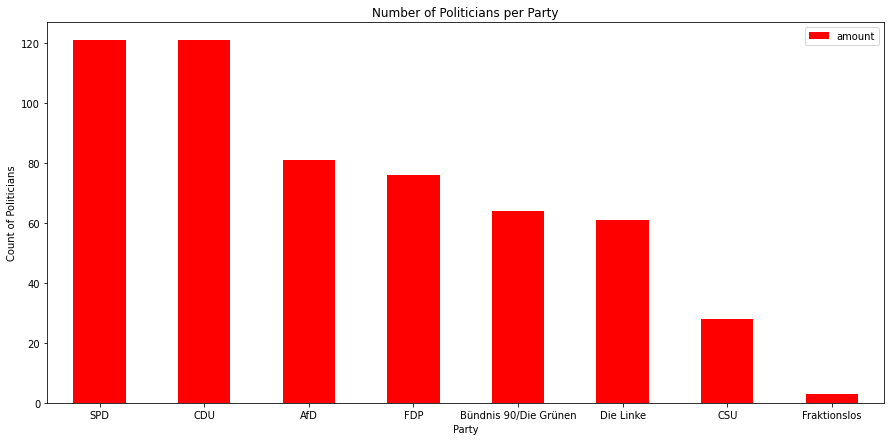

In [17]:
#Politicians per party with 0 Tweets-Politicians
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

rawData = pd.read_csv(r"politicians_tweets_stats.csv")
parties = rawData.party
data = parties.value_counts()
afd_amount = data.get('AfD') + data.get('AFD')
df = pd.DataFrame({'amount': rawData.party.value_counts()})
df.replace(data.get('AfD'), afd_amount, inplace=True)
df.drop(index='AFD', inplace=True)
chart = df.plot.bar(figsize=(15,7), rot=0, color=['red', 'black', 'blue', 'yellow', 'green', 'purple', 'lightblue', 'grey'])
chart.set(title="Number of Politicians per Party", xlabel="Party", ylabel="Count of Politicians")


party
SPD                      53928
FDP                      52173
CDU                      50554
Bündnis 90/Die Grünen    49377
Die Linke                45330
AfD                      29750
Fraktionslos              8330
CSU                       6146
Name: amount, dtype: int64
     amount                  party
0       299                    CDU
1      1011                    SPD
2       355  Bündnis 90/Die Grünen
4      1187                    CSU
5       936                    CDU
..      ...                    ...
550     351                    AFD
551    5141  Bündnis 90/Die Grünen
552   13199                    CDU
553    3243                    SPD
554    4253                    SPD

[503 rows x 2 columns]


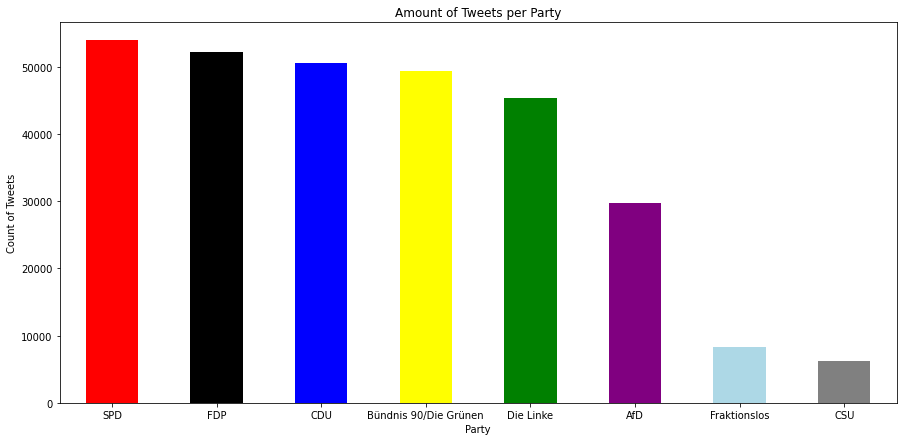

In [16]:
# Tweets per Party
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

rawData = pd.read_csv(r"politicians_tweets_stats.csv")
newData = rawData[rawData.total_tweets_found != 0]
total_tweets = newData.total_tweets_found

newData.drop(columns=['name', 'screen_name', 'tweets_by_politician', 'ratio'], inplace=True)
df = pd.DataFrame({'amount': newData.total_tweets_found, 'party': newData.party})
df_grouped = df.groupby(['party'])['amount'].sum()
afd_amount = df_grouped.get('AfD') + df_grouped.get('AFD')
df_grouped.replace(df_grouped.get('AfD'), afd_amount, inplace=True)
df_grouped.drop(index='AFD', inplace=True)
df_grouped.sort_values(ascending=False, inplace=True)
print(df_grouped)
chart = df_grouped.plot.bar(x = 'party', y='amount', rot=0, figsize=(15,7), title='Amount of Tweets per Party', color=['red', 'black', 'blue', 'yellow', 'green', 'purple', 'lightblue', 'grey'])
chart.set(xlabel="Party", ylabel="Count of Tweets")
print(df)


party
CDU/CSU                  56700
SPD                      53928
FDP                      52173
Bündnis 90/Die Grünen    49377
Die Linke                45330
AfD                      29750
Fraktionslos              8330
Name: amount, dtype: int64
     amount                  party
0       299                CDU/CSU
1      1011                    SPD
2       355  Bündnis 90/Die Grünen
4      1187                CDU/CSU
5       936                CDU/CSU
..      ...                    ...
550     351                    AFD
551    5141  Bündnis 90/Die Grünen
552   13199                CDU/CSU
553    3243                    SPD
554    4253                    SPD

[503 rows x 2 columns]


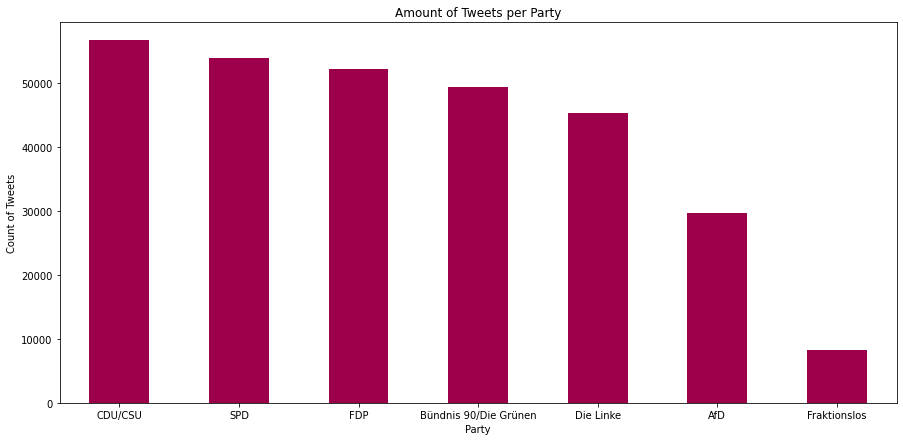

In [34]:
#Tweets per Party CDU & CSU
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

rawData = pd.read_csv(r"politicians_tweets_stats.csv")
newData = rawData[rawData.total_tweets_found != 0]
total_tweets = newData.total_tweets_found

newData.drop(columns=['name', 'screen_name', 'tweets_by_politician', 'ratio'], inplace=True)
df = pd.DataFrame({'amount': newData.total_tweets_found, 'party': newData.party})
df.replace("CDU", "CDU/CSU", inplace=True)
df.replace("CSU", "CDU/CSU", inplace=True)
df_grouped = df.groupby(['party'])['amount'].sum()
afd_amount = df_grouped.get('AfD') + df_grouped.get('AFD')
df_grouped.replace(df_grouped.get('AfD'), afd_amount, inplace=True)
df_grouped.drop(index='AFD', inplace=True)
df_grouped.sort_values(ascending=False, inplace=True)
print(df_grouped)
chart = df_grouped.plot.bar(x = 'party', y='amount', rot=0, figsize=(15,7), title='Amount of Tweets per Party', color='#9C004B')
chart.set(xlabel="Party", ylabel="Count of Tweets")
print(df)
